In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from in2stellar import Tracks, SimpleNetwork, SimpleGrid

In [2]:
save_path = '.data/test_03'
data_path = '/Volumes/daviesgr-cartography/mesa_grid/grid2_zams_agb/simple_grid_alex/'

In [3]:
tracks = Tracks(data_path)
tracks.load(save_path, 'tracks_metadata.csv', 'tracks_data.csv')

In [4]:
tracks.get_metadata()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.09Y0.26FeH0.0MLT1.9ov0.0dif1.csv,1.09,0.26,0.0,1.9,0.0,1
1,m1.01Y0.26FeH0.0MLT1.9ov0.0dif1.csv,1.01,0.26,0.0,1.9,0.0,1
2,m1.08Y0.26FeH0.0MLT1.9ov0.0dif1.csv,1.08,0.26,0.0,1.9,0.0,1
3,m0.92Y0.26FeH0.0MLT1.9ov0.0dif1.csv,0.92,0.26,0.0,1.9,0.0,1
4,m0.94Y0.26FeH0.0MLT1.9ov0.0dif1.csv,0.94,0.26,0.0,1.9,0.0,1
5,m1.06Y0.26FeH0.0MLT1.9ov0.0dif1.csv,1.06,0.26,0.0,1.9,0.0,1
6,m1.05Y0.26FeH0.0MLT1.9ov0.0dif1.csv,1.05,0.26,0.0,1.9,0.0,1
7,m0.97Y0.26FeH0.0MLT1.9ov0.0dif1.csv,0.97,0.26,0.0,1.9,0.0,1
8,m0.96Y0.26FeH0.0MLT1.9ov0.0dif1.csv,0.96,0.26,0.0,1.9,0.0,1
9,m0.91Y0.26FeH0.0MLT1.9ov0.0dif1.csv,0.91,0.26,0.0,1.9,0.0,1


In [5]:
tracks.compile_data()

In [6]:
tracks.save(save_path)

In [13]:
tracks.get_data(['luminosity', 'initial_feh']).to_numpy()

array([[9.90704206, 0.        ],
       [9.65244826, 0.        ],
       [9.45728737, 0.        ],
       ...,
       [3.59229371, 0.        ],
       [3.60954552, 0.        ],
       [3.62684409, 0.        ]])

In [34]:
def log10(df, cols, inplace=True):
    log_cols = [f'log_{col}' for col in cols]
    log_df = np.log10(df.loc[:, cols])
    if inplace:
        df[log_cols] = log_df
    else:
        return log_df.rename(columns={c: lc for c, lc in zip(cols, log_cols)})

In [15]:
log10(tracks._data, ['initial_mass', 'star_age', 'effective_T', 'radius', 'delta_nu_fit', 'frac_age'])

In [16]:
tracks.get_data()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,star_feh,delta_nu_fit,log_initial_mass,log_star_age,log_effective_T,log_radius,log_delta_nu_fit,log_frac_age
0,0,1.09,0.26,0.0,1.9,1.090000,0.000117,0.000020,4488.539347,9.907042,5.212196,3.041274,-0.000131,11.038821,0.037426,-3.933622,3.652105,0.717021,1.042923,-4.694625
1,0,1.09,0.26,0.0,1.9,1.090000,0.000121,0.000021,4491.724089,9.652448,5.137495,3.053813,-0.000120,11.285578,0.037426,-3.916679,3.652413,0.710751,1.052524,-4.677682
2,0,1.09,0.26,0.0,1.9,1.090000,0.000125,0.000022,4493.870699,9.457287,5.080436,3.063514,-0.000109,11.480463,0.037426,-3.903584,3.652621,0.705901,1.059959,-4.664587
3,0,1.09,0.26,0.0,1.9,1.090000,0.000128,0.000022,4495.498372,9.307561,5.036410,3.071074,-0.000096,11.634611,0.037426,-3.893386,3.652778,0.702121,1.065752,-4.654389
4,0,1.09,0.26,0.0,1.9,1.090000,0.000130,0.000023,4496.841532,9.191788,5.002000,3.077029,-0.000082,11.757501,0.037426,-3.885355,3.652908,0.699144,1.070315,-4.646358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18750,2,1.04,0.26,0.0,1.9,1.036313,9.679617,1.355186,4874.547122,3.554084,2.647001,3.607872,-0.008207,31.994265,0.017033,0.985858,3.687934,0.422754,1.505072,0.131999
18751,2,1.04,0.26,0.0,1.9,1.036306,9.681933,1.355510,4873.446355,3.574062,2.655630,3.605043,-0.008079,31.842892,0.017033,0.985962,3.687836,0.424168,1.503013,0.132103
18752,2,1.04,0.26,0.0,1.9,1.036300,9.684028,1.355803,4872.478080,3.592294,2.663453,3.602485,-0.007949,31.692608,0.017033,0.986056,3.687750,0.425445,1.500958,0.132197
18753,2,1.04,0.26,0.0,1.9,1.036294,9.686023,1.356083,4871.624974,3.609546,2.670776,3.600098,-0.007751,31.568177,0.017033,0.986146,3.687674,0.426637,1.499249,0.132286


In [24]:
tracks.set_data(tracks.select_evolution(['dwarf', 'giant']))
tracks.get_data()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,star_feh,delta_nu_fit,log_initial_mass,log_star_age,log_effective_T,log_radius,log_delta_nu_fit,log_frac_age
413,1,1.09,0.26,0.0,1.9,1.090000,0.029666,0.005143,5939.079064,1.146473,1.012750,4.464311,-0.000222,138.612208,0.037426,-1.527741,3.773719,0.005502,2.141801,-2.288744
414,1,1.09,0.26,0.0,1.9,1.090000,0.030049,0.005210,5933.061768,1.130156,1.007559,4.468775,-0.000229,139.665287,0.037426,-1.522177,3.773279,0.003270,2.145088,-2.283180
415,1,1.09,0.26,0.0,1.9,1.090000,0.030495,0.005287,5927.244119,1.115797,1.003104,4.472624,-0.000237,140.581242,0.037426,-1.515767,3.772853,0.001346,2.147927,-2.276770
416,1,1.09,0.26,0.0,1.9,1.090000,0.031031,0.005380,5921.960757,1.104141,0.999632,4.475636,-0.000247,141.303586,0.037426,-1.508197,3.772466,-0.000160,2.150153,-2.269201
417,1,1.09,0.26,0.0,1.9,1.090000,0.031675,0.005492,5917.780342,1.096247,0.997460,4.477525,-0.000262,141.760466,0.037426,-1.499285,3.772159,-0.001105,2.151555,-2.260289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18750,2,1.04,0.26,0.0,1.9,1.036313,9.679617,1.355186,4874.547122,3.554084,2.647001,3.607872,-0.008207,31.994265,0.017033,0.985858,3.687934,0.422754,1.505072,0.131999
18751,2,1.04,0.26,0.0,1.9,1.036306,9.681933,1.355510,4873.446355,3.574062,2.655630,3.605043,-0.008079,31.842892,0.017033,0.985962,3.687836,0.424168,1.503013,0.132103
18752,2,1.04,0.26,0.0,1.9,1.036300,9.684028,1.355803,4872.478080,3.592294,2.663453,3.602485,-0.007949,31.692608,0.017033,0.986056,3.687750,0.425445,1.500958,0.132197
18753,2,1.04,0.26,0.0,1.9,1.036294,9.686023,1.356083,4871.624974,3.609546,2.670776,3.600098,-0.007751,31.568177,0.017033,0.986146,3.687674,0.426637,1.499249,0.132286


In [27]:
x_cols = ['log_initial_mass', 'log_frac_age']
y_cols = ['log_star_age', 'log_effective_T', 'log_radius', 'log_delta_nu_fit']

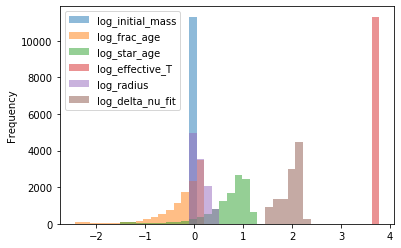

In [28]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [29]:
tracks.summary()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,star_feh,delta_nu_fit,log_initial_mass,log_star_age,log_effective_T,log_radius,log_delta_nu_fit,log_frac_age
count,11312.000000,11312.000000,1.131200e+04,11312.0,1.131200e+04,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000,11312.000000
mean,1.401167,0.997856,2.600000e-01,0.0,1.900000e+00,0.996884,6.849682,0.781760,5575.960169,1.590842,1.353313,4.218877,-0.060342,102.740317,-0.001609,0.683476,3.745551,0.108490,1.970671,-0.249049
std,0.490156,0.055730,1.110272e-16,0.0,2.220544e-16,0.055676,4.108622,0.427673,324.597869,0.750682,0.471628,0.270056,0.037971,39.731204,0.024244,0.484117,0.026122,0.136524,0.201817,0.476807
min,1.000000,0.910000,2.600000e-01,0.0,1.900000e+00,0.906787,0.029666,0.003662,4788.821137,0.480953,0.799480,3.597361,-0.139381,31.114376,-0.040959,-1.527741,3.680229,-0.097192,1.492961,-2.436240
50%,1.000000,0.990000,2.600000e-01,0.0,1.900000e+00,0.990000,6.796951,0.803177,5659.183897,1.411143,1.170760,4.308531,-0.058132,108.461617,-0.004365,0.832314,3.752754,0.068468,2.035276,-0.095189
max,2.000000,1.090000,2.600000e-01,0.0,1.900000e+00,1.090000,15.790225,1.408876,5993.638740,3.883332,2.738816,4.591315,-0.000194,180.719950,0.037426,1.198388,3.777691,0.437563,2.257006,0.148873


In [30]:
tracks.save(save_path)

In [35]:
def normalize(df, cols, loc=0.0, scale=1.0, inplace=False):
    '''Normalize columns in dataframe by a given location and scale.
    loc and scale can be a numpy array or pandas series with the same
    length as cols.
    
    Must remember what you scaled things with in order to unnormalize
    neural netowrk output! This could be handled by saving the location
    and scale dictionaries with the neural networks?
    
    TODO: loc and scale are a string corresponding to a summary statistic
    they can also be None which corresponds to 0 or 1, or something custom
    which will come with a warning to save the values for future use.
    '''
    suffix = 'norm'
    norm_cols = [f'{col}_{suffix}' for col in cols]
    norm_df = (df.loc[:, cols] - loc) / scale
    if inplace:
        df[norm_cols] = norm_df
    else:
        return norm_df.rename(columns={c: lc for c, lc in zip(cols, norm_cols)})

In [36]:
loc = tracks.summary().loc['50%', x_cols + y_cols]
loc

log_initial_mass   -0.004365
log_frac_age       -0.095189
log_star_age        0.832314
log_effective_T     3.752754
log_radius          0.068468
log_delta_nu_fit    2.035276
Name: 50%, dtype: float64

HAVE IT SO THAT YOU CAN CHOOSE A SUMMARY STAT TO NORMALISE BY, THAT WAY THE SUMMARY STATS ARE SAVED. SAVE THEM IN A CLASS ATTRIBUTE TOO IF A CUSTOM ONE IS CHOSEN

In [38]:
normalize(tracks._data, x_cols+y_cols, loc=loc, inplace=True)

In [40]:
x_cols = ['log_initial_mass_norm', 'log_frac_age_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm', 'log_delta_nu_fit_norm']

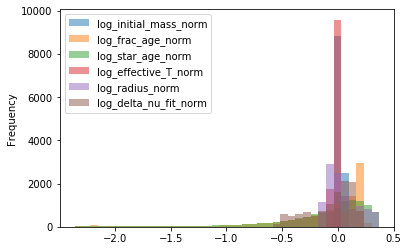

In [51]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

Below could be the kind of thing that the network side deals with. It takes the data as an input and the x and y columns and then allows the user to choose what float format, validation fraction and test fraction

1. Validation - not trained on but used by e.g. a grid to evaluate hyperparameters

2. Test - not trained on or used in any evaluation until the final model is chosen.

In our case, the Test set is going to be a specific set of models generated randomly by Tanda, and validation is handled by Keras... but it may be wise to choose a custom validation split within Network or Grid so that this can be reserved for use in the evaluation function.

In [41]:
data = tracks.get_data(x_cols+y_cols)
data.head()

,log_initial_mass_norm,log_frac_age_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm
413,0.041791,-2.193556,-2.360055,0.020965,-0.062966,0.106525
414,0.041791,-2.187991,-2.354491,0.020525,-0.065198,0.109812
415,0.041791,-2.181581,-2.348081,0.020099,-0.067122,0.112651
416,0.041791,-2.174012,-2.340512,0.019712,-0.068628,0.114877
417,0.041791,-2.165100,-2.331599,0.019405,-0.069573,0.116279


In [43]:
len(data)

11312

In [44]:
x = data[x_cols].to_numpy(dtype=np.float32)
y = data[y_cols].to_numpy(dtype=np.float32)

In [48]:
print(f'x:\n{x}\n\ny:\n{y}')

x:
[[ 0.0417913  -2.1935558 ]
 [ 0.0417913  -2.1879911 ]
 [ 0.0417913  -2.1815813 ]
 ...
 [ 0.02139814  0.22738527]
 [ 0.02139814  0.22747473]
 [ 0.02139814  0.22756217]]

y:
[[-2.3600554   0.0209653  -0.06296556  0.10652541]
 [-2.3544908   0.02052506 -0.06519775  0.10981241]
 [-2.3480806   0.02009901 -0.06712221  0.1126513 ]
 ...
 [ 0.15374191 -0.06500391  0.35697693 -0.5343181 ]
 [ 0.15383138 -0.06507996  0.35816938 -0.5360266 ]
 [ 0.15391883 -0.06515891  0.35936546 -0.53790885]]


In [49]:
network = SimpleNetwork(path=save_path, name='network_03', depth=4, width=64, activation='elu', batch_size=128)

In [50]:
network.build(x.shape[1], y.shape[1])

In [52]:
network.compile('nadam', metrics=['mse'])

In [53]:
network.save_params()
network.save_model()

'network_03_model.h5'

In [73]:
network.train(x, y, epochs=2000)

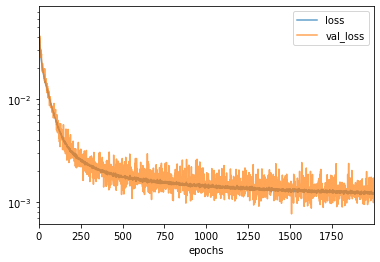

In [74]:
network.history.plot(x='epochs', y=['loss', 'val_loss'], logy=True, alpha=0.7)

In [75]:
network.save_model()
network.save_history()  # <--- fix that these return the filenames, no longer needed.

'network_03_history.csv'

Below should have y_col names, add this to code.

In [76]:
network.scores(x, y)  # <--- these should be on a reserved test set, not the whole dataset

,mean,std,16%,50%,84%
0,0.001369,0.000979,0.000375,0.001168,0.002497
1,0.000469,0.000516,0.000057,0.000292,0.000873
2,0.001205,0.001527,0.000174,0.000723,0.002063
3,0.001603,0.002222,0.000319,0.000968,0.002267


In [102]:
y_pred = network.predict(x)

Text(0, 0.5, '$\\log(R/R_\\odot) - 3.753$')

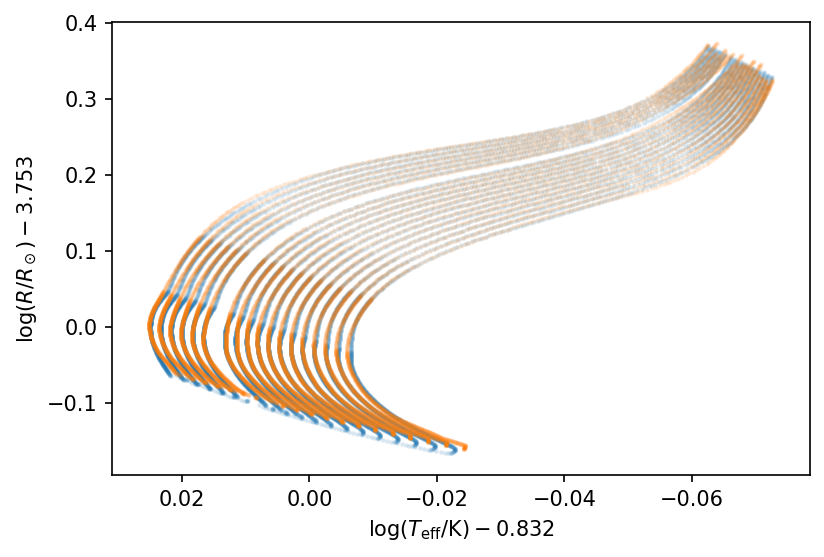

In [138]:
plt.figure(dpi=150)

plt.scatter(y[:, 1], y[:, 2], alpha=0.1, s=2)
plt.scatter(y_pred[:, 1], y_pred[:, 2], alpha=0.1, s=2)

plt.gca().invert_xaxis()

plt.xlabel(r'$\log(T_{\mathrm{eff}}/\mathrm{K})'+f'- {loc[2].round(3)}$')
plt.ylabel(rf'$\log(R/R_\odot) - {loc[3].round(3)}$')

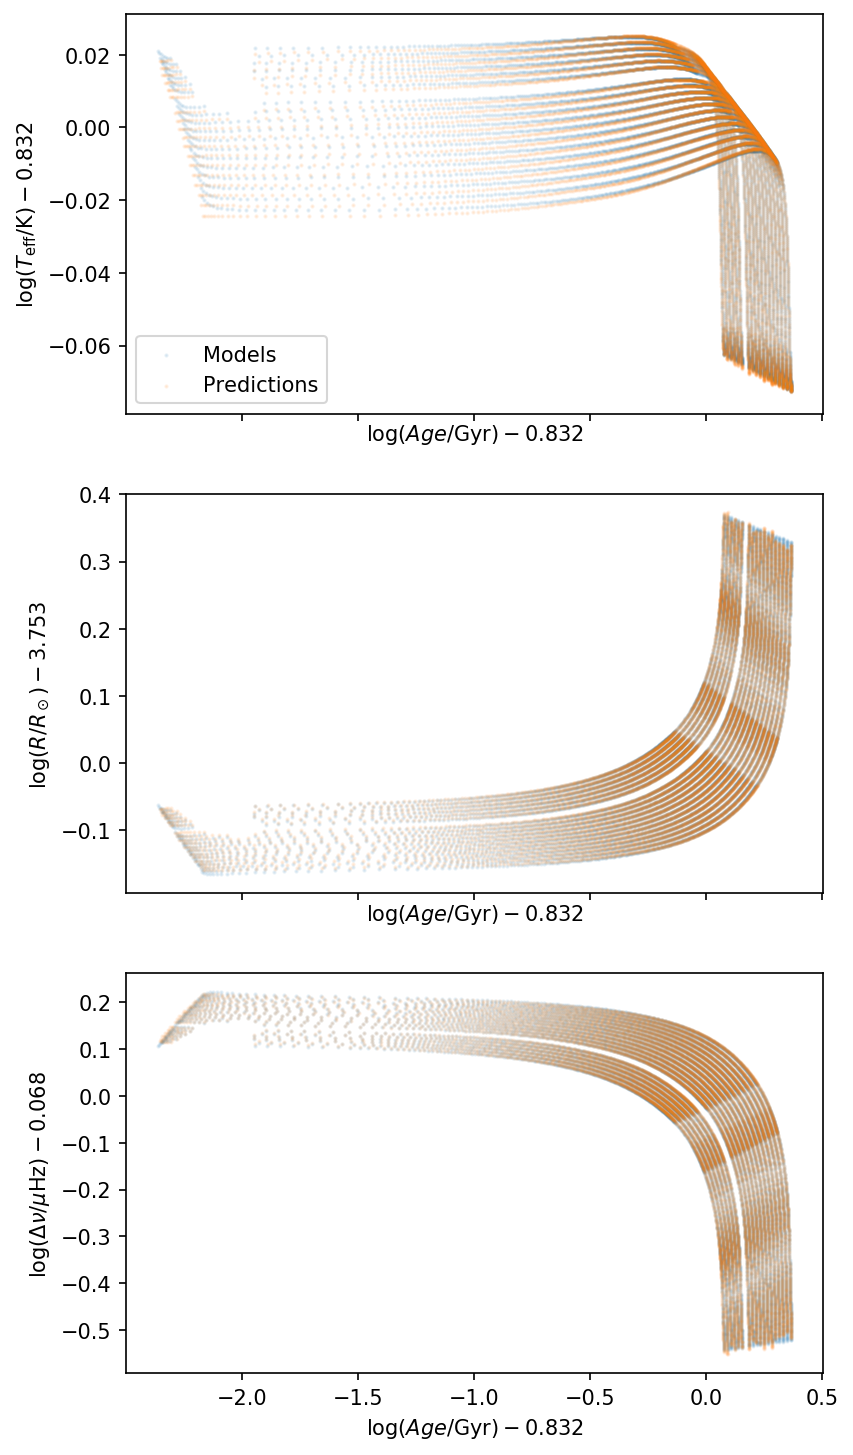

In [137]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12), dpi=150, sharex=True)

for i, (ylabel, ax) in enumerate(zip([r'$\log(T_{\mathrm{eff}}/\mathrm{K})'+f'- {loc[2].round(3)}$',
                                      rf'$\log(R/R_\odot) - {loc[3].round(3)}$',
                                      r'$\log(\Delta\nu/\mu\mathrm{Hz})'+f'- {loc[4].round(3)}$'],
                                 axes)):

    ax.scatter(y[:, 0], y[:, i+1], alpha=0.1, s=1, label='Models')
    ax.scatter(y_pred[:, 0], y_pred[:, i+1], alpha=0.1, s=1, label='Predictions')

    ax.set_xlabel(r'$\log(Age/\mathrm{Gyr})'+f'- {loc[2].round(3)}$')
    ax.set_ylabel(ylabel)

axes[0].legend()

In [139]:
y_err = np.abs(y - y_pred)

Text(0.5, 1.0, 'stacked histogram')

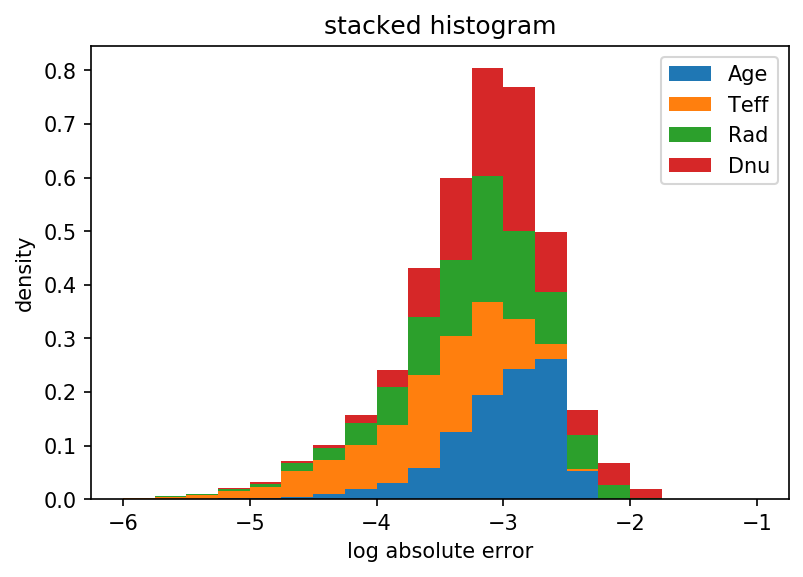

In [164]:
plt.figure(dpi=150)
plt.hist(np.log10(y_err), density=True, bins=20, range=(-6, -1), stacked=True, label=['LogAge', 'LogTeff',
                                                                                      'LogRad', 'LogDnu'])
plt.xlabel('log absolute error')
plt.ylabel('density')
plt.legend()
plt.title('stacked histogram')

The above plot shows that all outputs behave pretty well, with effective temperature and radius the best, and age the worst. I will continue to play with age as an output or input and see how that goes.

It seems that the larger the dynamic range of the training data output, the worse it initially performs. This is counter-intuitive but makes sense if you imagine the neural network taking priority over the small dynamic range parameters.